# Salary investigation - Feature engineering and Machine learning

**Still working. For data analysis and visualisation, please check the "detailed_analysis_visual_on_income" notebook**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
# sklearn.set_config(print_changed_only=True)
%matplotlib inline

In [2]:
df = pd.read_csv("data/adult.csv", index_col=0)
df['income'] = df['income'].str.replace(" ", "")

# remove the column education-num because it is similar to education
df = df.drop(columns=['education-num'])

print(df.dtypes)

kinds = np.array([dt.kind for dt in df.dtypes])
# print(kinds)

all_col = df.columns.values
is_num = kinds != 'O'
# print(is_num)
num_col = all_col[is_num]
print(num_col)

cat_col = all_col[~is_num]
print(cat_col)

df.head()


# Think for this data, because the target column (income) is a binary value, using x-y plot is difficult to 
# see the relationship between x and y. I think it is better to use histogram, with y as colors

age                int64
workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
gender            object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object
['age' 'capital-gain' 'capital-loss' 'hours-per-week']
['workclass' 'education' 'marital-status' 'occupation' 'relationship'
 'race' 'gender' 'native-country' 'income']


,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


All features:
* Workclass (categorical)
* education (categorical)
* marital-status (categorical)
* occupation (categorical)
* relationship (categorical)
* race (categorical)
* gender (categorical)

* native-country (categorical with engineering)


* age (numerical values)
* education-num (numerical values) (deleted)
* hours-per-week (numerical values)
* capital-gain (numerical values)
* capital-loss (numerical values)

## Start feature engineering

### Label encoding using one-hot encoding

In [3]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def label_encode(df, X_col, label_encode_col, Y_col=''):
# y_encode_col = 'income'
# X_col is the column names of the features that I am going to use.
# label_encode_col is a list that contains the columns that one wants to encode 

    LEncoder = LabelEncoder()
    OHEncoder = OneHotEncoder()

    X_label_enc = df[X_col]
    
    if Y_col:
        y = df[Y_col]
    else:
        y = df[df.columns[-1]]

    for col in label_encode_col:
        # The column names have a space in front. Clear it
    #     cleaned_col = col.replace(' ', '')
    #     print(cleaned_col)

        ## TODO Fixed the empty space in front of the column name
        temp_dummy = pd.get_dummies(X_label_enc[col],prefix=col,prefix_sep='-')
        cleaned_val = [c.replace(' ','') for c in temp_dummy.columns]
        cleaned_cols = {k:v for (k,v) in zip(temp_dummy.columns, cleaned_val)}
    #     print(cleaned_cols)
        temp_dummy.rename(columns=cleaned_cols, inplace=True)
    #     print('temp_dummy.columns:', temp_dummy.head(2))
        X_label_enc.drop(columns=col, inplace=True)
        X_label_enc = X_label_enc.merge(temp_dummy, left_index=True, right_index=True)
    #     print(X_label_enc.columns)

    #     print(X)
    # Use for loop to fit and trasnform each column that needs to be encoded
    #     X_label_enc[col] = LEncoder.fit_transform(X_label_enc[col])
    #     X_label_enc[col] = OHEncoder.fit_transform(X_label_enc[col].reshape(-1,1))


    # print(pd.get_dummies(X_label_enc['workclass']))

    # LEncoder.fit_transform(df[columns[0]])
    y_encode = LEncoder.fit_transform(y)
    
    return X_label_enc, y_encode

In [13]:
# Not including education because it has strong correlation with education-num
label_encode_col = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

X_col = df.columns[:-1]
print(X_col)
X_cat_label_enc, y_encode = label_encode(df, X_col, label_encode_col)


# print(X_label_enc.columns.tolist())

X_cat_label_enc = X_cat_label_enc.drop(columns=['capital-gain', 'capital-loss'])

X_cat_label_enc.head()

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country'],
      dtype='object')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,age,hours-per-week,workclass-?,workclass-Federal-gov,workclass-Local-gov,workclass-Never-worked,workclass-Private,workclass-Self-emp-inc,workclass-Self-emp-not-inc,workclass-State-gov,...,native-country-Portugal,native-country-Puerto-Rico,native-country-Scotland,native-country-South,native-country-Taiwan,native-country-Thailand,native-country-Trinadad&Tobago,native-country-United-States,native-country-Vietnam,native-country-Yugoslavia
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Functions that perform vertical quartile quantification and then horizontal binning
Since several columns require the same procedure (age, capital-gain and capital-loss), will write functions here
for calling <br>
For capital-gain and capital-loss, because there are too many different horizontal values (different amount of capital-gain/capital-loss, thus, would just use a horizontal qcut and omit the vertical one. <br><br>
Because most people have 0 capital-gain, most quartiles are concentrated close to 0 too.
By setting duplicate drop, don't get to see a lot of different bins even though quartile cut is big

## Capital-gain and capital-loss binning
There are too many different values for capital-gain and capital-loss (and quite a few outliers).
So similar to age feature engineering, I will use a vertical quartile quantification method to limit the horizontal ranges.


The amount of money is again a continuous value, so might have to consider to similar things as age featuring
where I do the horizontal binning based on levels

In [5]:
def bin_num_col(df, col_list, q_num, drop_zero=False):
    # binning numerical columns with qcut. col should just be one column string. q_num is the number of bins to be made
    # if drop_zero=True, set zero as one of the bin then drop it, then perform qcut with the rest
    # print(df_process['capital-gain'])
    # df_process['capital-gain'].value_counts() # Most people have 0 capital-gain (perhaps no investment?)
    
    for col in col_list:
        binned = []
    #     temp_df = df.copy()



        if drop_zero == True:
            binned.extend([-0.01, 0.01])
            temp_df = df[(df[col] < -0.01) | (df[col] > 0.01)][col]
    #         print(temp_df)
        else:
            temp_df = df[col]

        if col in df.columns:
            ser, temp_binned = pd.qcut(temp_df, q=q_num, duplicates="drop", retbins=True)
            # With retbins=True, pd.qcut returns a tuple whose second element is the bins
            # The first return element is a series while the second one is the break point
            binned.extend(temp_binned)
    #         print(binned)

            # bin_cap_gain -= 0.01
            # Need to do this because the cut is excluding the left hand side boundary value, which means 0 would not
            # be include in (0 x]

            binned_col = pd.cut(df[col], bins=binned, include_lowest=True)

            binned_dummy = pd.get_dummies(binned_col,prefix= col + '_binned',prefix_sep='-')
    #         df.drop(columns=[col], inplace=True)  
            df = df.merge(binned_dummy, left_index=True, right_index=True)
    
    return df

In [6]:
X_var_bin = bin_num_col(df, ['capital-gain', 'capital-loss'], 5, drop_zero=True)
# df_var_bin = bin_num_col(df, 'capital-loss', 5, drop_zero=True)
# df_process = bin_num_col(df_process, 'education-num', 5)

X_var_bin = X_var_bin.drop(columns=['age', 'workclass', 'education', 'marital-status', 'occupation', \
                                        'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', \
                                        'income', 'hours-per-week', 'native-country'])

X_var_bin.head()

,"capital-gain_binned-(-0.011, 0.01]","capital-gain_binned-(0.01, 114.0]","capital-gain_binned-(114.0, 3103.0]","capital-gain_binned-(3103.0, 5013.0]","capital-gain_binned-(5013.0, 7688.0]","capital-gain_binned-(7688.0, 15024.0]","capital-gain_binned-(15024.0, 99999.0]","capital-loss_binned-(-0.011, 0.01]","capital-loss_binned-(0.01, 155.0]","capital-loss_binned-(155.0, 1617.0]","capital-loss_binned-(1617.0, 1876.0]","capital-loss_binned-(1876.0, 1902.0]","capital-loss_binned-(1902.0, 2001.0]","capital-loss_binned-(2001.0, 4356.0]"
0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [8]:
X_processed = X_cat_label_enc.join(X_var_bin)

X_processed.head()
# This is the processed dataframe ready for ML model building

,age,hours-per-week,workclass-?,workclass-Federal-gov,workclass-Local-gov,workclass-Never-worked,workclass-Private,workclass-Self-emp-inc,workclass-Self-emp-not-inc,workclass-State-gov,...,"capital-gain_binned-(5013.0, 7688.0]","capital-gain_binned-(7688.0, 15024.0]","capital-gain_binned-(15024.0, 99999.0]","capital-loss_binned-(-0.011, 0.01]","capital-loss_binned-(0.01, 155.0]","capital-loss_binned-(155.0, 1617.0]","capital-loss_binned-(1617.0, 1876.0]","capital-loss_binned-(1876.0, 1902.0]","capital-loss_binned-(1902.0, 2001.0]","capital-loss_binned-(2001.0, 4356.0]"
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Decision tree model building and prediction

In [4]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encode, test_size=0.2, random_state=42)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)



NameError: name 'X_processed' is not defined

accuracy score: 0.8108398587440504
balanced accuracy score: 0.7394526346484915
precision score: 0.6092843326885881
average_precision score: 0.4626168581963265
recall score: 0.6015276893698281
F1-score: 0.6053811659192826
confusion_matrix:
[[4336  606]
 [ 626  945]]
classification_report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      4942
           1       0.61      0.60      0.61      1571

    accuracy                           0.81      6513
   macro avg       0.74      0.74      0.74      6513
weighted avg       0.81      0.81      0.81      6513

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]
[[0]
 [0]
 [1]
 ...
 [1]
 [0]
 [0]]
roc-score: 0.7394526346484916


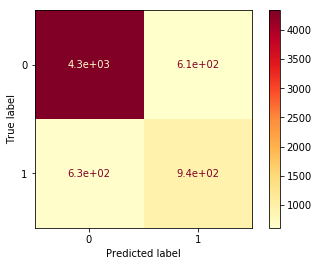

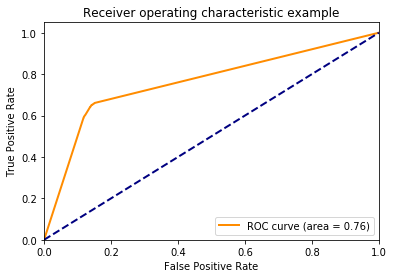

In [67]:
from sklearn import metrics

y_predict = clf.predict(X_test)

acc_score = metrics.accuracy_score(y_test, y_predict)
print("accuracy score: " + str(acc_score))

ba_acc_score = metrics.balanced_accuracy_score(y_test, y_predict)
print("balanced accuracy score: " + str(ba_acc_score))

prec_score = metrics.precision_score(y_test, y_predict)
print("precision score: " + str(prec_score))

avg_prec_score = metrics.average_precision_score(y_test, y_predict)
print("average_precision score: " + str(avg_prec_score))

recall_score = metrics.recall_score(y_test, y_predict)
print("recall score: " + str(recall_score))

f1_score = metrics.f1_score(y_test, y_predict)
print("F1-score: " + str(f1_score))

confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
print('confusion_matrix:')
print(confusion_matrix)





report = metrics.classification_report(y_test, y_predict)
print('classification_report:')
print(report)

metrics.plot_confusion_matrix(clf, X_test, y_test, cmap='YlOrRd', normalize=None)


## Getting AUROC value and plot ROC
y_score = clf.predict_proba(X_test)
print(y_score)
y_test_lb = label_binarize(y_test, classes=[0, 1])
print(y_test_lb)

roc_auc_score = sklearn.metrics.roc_auc_score(y_test, y_predict)
print('roc-score: ' + str(roc_auc_score))
fpr, tpr, _ = metrics.roc_curve(y_test_lb, y_score[:, 1])
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

In [69]:
print(tpr)

[0.         0.59007002 0.59007002 0.59134309 0.59898154 0.59961808
 0.60089115 0.60152769 0.63717377 0.64035646 0.64162954 0.64162954
 0.65117759 0.65117759 0.65117759 0.65117759 0.65372374 0.65372374
 0.65563335 0.65626989 0.65881604 0.65945258 0.66072565 0.66072565
 0.66072565 0.66136219 1.        ]


## ColumnTransformer technique

The ColumnTransformer takes a list of three-item tuples. The first value in the tuple is a name that labels it, the second is an instantiated estimator, and the third is a list of columns you want to apply the transformation to. The tuple will look like this:

('name', SomeTransformer(parameters), columns)

### Categorical feature processing

In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [6]:
edu_train = df[['education']].copy()

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
edu_train_transformed = ohe.fit_transform(edu_train)
feat_name = ohe.get_feature_names()
# print(feat_name)
print(feat_name[edu_train_transformed[0]==1])
print(edu_train.loc[0])

['x0_ Bachelors']
education     Bachelors
Name: 0, dtype: object


In [7]:
edu_train.iloc[0, 0] = np.nan

si = SimpleImputer(strategy='constant', fill_value='MISSING')
edu_train_imputed = si.fit_transform(edu_train)
edu_train_imputed

array([['MISSING'],
       [' Bachelors'],
       [' HS-grad'],
       ...,
       [' HS-grad'],
       [' HS-grad'],
       [' HS-grad']], dtype=object)

In [90]:
edu_train = df[['education']].copy()
edu_transformed.shape

(32561, 17)

In [89]:
si_step = ('si', SimpleImputer(strategy='constant',
                fill_value='MISSING'))
ohe_step = ('ohe', OneHotEncoder(sparse=False,
                handle_unknown='ignore'))
steps = [si_step, ohe_step]
pipe = Pipeline(steps)

edu_train = df[['education']].copy()
edu_train.iloc[0, 0] = np.nan
edu_transformed = pipe.fit_transform(edu_train)
edu_transformed.shape

(32561, 17)

In [8]:
cat_si_step = ('si', SimpleImputer(strategy='constant',
                   fill_value='MISSING'))
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False,
                    handle_unknown='ignore'))

cat_steps = [cat_si_step, cat_ohe_step]
cat_pipe = Pipeline(cat_steps)
cat_cols = ['education', 'workclass']
cat_transformers = [('cat', cat_pipe, cat_cols)]
ct = ColumnTransformer(transformers=cat_transformers)

X_cat_transformed = ct.fit_transform(df)
X_cat_transformed.shape

(32561, 25)

In [9]:
pl = ct.named_transformers_['cat']
ohe = pl.named_steps['ohe']
print(ohe.get_feature_names())

['x0_ 10th' 'x0_ 11th' 'x0_ 12th' 'x0_ 1st-4th' 'x0_ 5th-6th'
 'x0_ 7th-8th' 'x0_ 9th' 'x0_ Assoc-acdm' 'x0_ Assoc-voc' 'x0_ Bachelors'
 'x0_ Doctorate' 'x0_ HS-grad' 'x0_ Masters' 'x0_ Preschool'
 'x0_ Prof-school' 'x0_ Some-college' 'x1_ ?' 'x1_ Federal-gov'
 'x1_ Local-gov' 'x1_ Never-worked' 'x1_ Private' 'x1_ Self-emp-inc'
 'x1_ Self-emp-not-inc' 'x1_ State-gov' 'x1_ Without-pay']


### Numerical feature processing

In [10]:
num_si_step = ('si', SimpleImputer(strategy='median'))
num_ss_step = ('ss', StandardScaler())

num_steps = [num_si_step, num_ss_step]
num_pipe = Pipeline(num_steps)
num_transformers = [('num', num_pipe, num_col)]
num_ct = ColumnTransformer(transformers=num_transformers)

X_num_processed = num_ct.fit_transform(df)
print(X_num_processed.shape)

(32561, 4)


### Combining both transformers

In [11]:
comb_transformers = [('cat', cat_pipe, cat_cols), \
                         ('num', num_pipe, num_col)]
comb_ct = ColumnTransformer(transformers=comb_transformers)

X_comb_processed = comb_ct.fit_transform(df)
X_comb_processed.shape

(32561, 29)

## Adding ML pipeline

In [14]:
ml_pipe = Pipeline([('transform', comb_ct), ('dt', tree.DecisionTreeClassifier())])

X = df[df.columns[:-1]]
y = df[df.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y_encode, test_size=0.2, random_state=42)

ml_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('transform',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  Pipeline(memory=None,
                                                           steps=[('si',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value='MISSING',
                                                                                 missing_values=nan,
                                                                                 strategy='constant',
                                                              

In [15]:
ml_pipe.score(X_train, y_train)

0.9115479115479116

## Perform cross-validation

In [16]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=123)
cr_score = cross_val_score(ml_pipe, X, y_encode, cv=kf)
print(cr_score)

[0.80761554 0.81142506 0.80543612 0.80528256 0.80159705]


## GridSearchCV

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'transform__num__si__strategy': ['mean', 'median'],
    'dt__splitter': ['best', 'random'],
    'dt__criterion': ['gini', 'entropy'],
    'dt__max_depth': [2, 6, 10, 20],
    'dt__min_samples_split': [2, 6],
    'dt__min_samples_leaf': [1, 3],
    'dt__max_features': [None, 'log2'],
    }

gs = GridSearchCV(ml_pipe, param_grid, cv=kf)
gs.fit(X, y_encode)

GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('transform',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('si',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                  

**GridSearch result can be converted into DataFrame to show the score of each parameter combination**

In [22]:
print(gs.best_score_)
print(gs.best_params_)
pd.DataFrame(gs.cv_results_)

0.8343724382646538
{'dt__criterion': 'gini', 'dt__max_depth': 10, 'dt__max_features': None, 'dt__min_samples_leaf': 3, 'dt__min_samples_split': 6, 'dt__splitter': 'best', 'transform__num__si__strategy': 'median'}


,mean_fit_time,mean_score_time,mean_test_score,param_dt__criterion,param_dt__max_depth,param_dt__max_features,param_dt__min_samples_leaf,param_dt__min_samples_split,param_dt__splitter,param_transform__num__si__strategy,params,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,std_fit_time,std_score_time,std_test_score
0,0.131446,0.025142,0.802617,gini,2,None,1,2,best,mean,"{'dt__criterion': 'gini', 'dt__max_depth': 2, ...",137,0.801013,0.803286,0.803747,0.801290,0.803747,0.007107,0.000746,0.001211
1,0.200253,0.038109,0.802617,gini,2,None,1,2,best,median,"{'dt__criterion': 'gini', 'dt__max_depth': 2, ...",137,0.801013,0.803286,0.803747,0.801290,0.803747,0.045072,0.009810,0.001211
2,0.154462,0.029311,0.772581,gini,2,None,1,2,random,mean,"{'dt__criterion': 'gini', 'dt__max_depth': 2, ...",223,0.766467,0.779945,0.759982,0.763974,0.792537,0.034954,0.003382,0.012022
3,0.162557,0.028534,0.773594,gini,2,None,1,2,random,median,"{'dt__criterion': 'gini', 'dt__max_depth': 2, ...",220,0.777675,0.802058,0.762592,0.760749,0.764896,0.030263,0.005475,0.015418
4,0.139842,0.029106,0.802617,gini,2,None,1,6,best,mean,"{'dt__criterion': 'gini', 'dt__max_depth': 2, ...",137,0.801013,0.803286,0.803747,0.801290,0.803747,0.012491,0.003300,0.001211
5,0.144205,0.026919,0.802617,gini,2,None,1,6,best,median,"{'dt__criterion': 'gini', 'dt__max_depth': 2, ...",137,0.801013,0.803286,0.803747,0.801290,0.803747,0.005104,0.003798,0.001211
6,0.131845,0.025720,0.778908,gini,2,None,1,6,random,mean,"{'dt__criterion': 'gini', 'dt__max_depth': 2, ...",207,0.770306,0.802058,0.764128,0.769502,0.788544,0.017285,0.001817,0.014210
7,0.146192,0.027555,0.766285,gini,2,None,1,6,random,median,"{'dt__criterion': 'gini', 'dt__max_depth': 2, ...",236,0.776447,0.759367,0.766892,0.760289,0.768428,0.015645,0.002293,0.006197
8,0.133232,0.027734,0.802617,gini,2,None,3,2,best,mean,"{'dt__criterion': 'gini', 'dt__max_depth': 2, ...",137,0.801013,0.803286,0.803747,0.801290,0.803747,0.014764,0.004663,0.001211
9,0.145027,0.024717,0.802617,gini,2,None,3,2,best,median,"{'dt__criterion': 'gini', 'dt__max_depth': 2, ...",137,0.801013,0.803286,0.803747,0.801290,0.803747,0.007167,0.000740,0.001211


### Age feature engineering
The ratio between people earning more than 50K and less than 50K changes with the age group.
With that, binning would be more effective if we can set the boundary at which the ratios change a lot.

1. In this example, all bins have more people earning less than 50K than people earning more than 50K. So the ratio would just be (Number of people earning less than 50K)/(Number of people earning more than 50K).
2. Some of the ratios can be huge (at young age) compared to low ratios. To reduce the effect of big ratio and increase the effect of smaller ratio change, log transfomration would be applied
3. Final step is to apply "Bayesian blocks", which is an adaptive method to find the optimal binning strategy

For a set of histogram bins or blocks, each of an arbirary size, one can use a Bayesain likelihood framework to compute a fitness function which only depeds on two numbers: the width of each block, and the number of points in each block. The edges betwen these blocks (the change-points) can be varied, and the overall block configuration with the maximum fitness is quantitatively the est binning.


In [ ]:
def bayesian_blocks(t):
    """Bayesian Blocks Implementation

    By Jake Vanderplas.  License: BSD
    Based on algorithm outlined in http://adsabs.harvard.edu/abs/2012arXiv1207.5578S

    Parameters
    ----------
    t : ndarray, length N
        data to be histogrammed

    Returns
    -------
    bins : ndarray
        array containing the (N+1) bin edges

    Notes
    -----
    This is an incomplete implementation: it may fail for some
    datasets.  Alternate fitness functions and prior forms can
    be found in the paper listed above.
    """
    # copy and sort the array
    t = np.sort(t)
    N = t.size

    # create length-(N + 1) array of cell edges
    edges = np.concatenate([t[:1],
                            0.5 * (t[1:] + t[:-1]),
                            t[-1:]])
    block_length = t[-1] - edges

    # arrays needed for the iteration
    nn_vec = np.ones(N)
    best = np.zeros(N, dtype=float)
    last = np.zeros(N, dtype=int)

    #-----------------------------------------------------------------
    # Start with first data cell; add one cell at each iteration
    #-----------------------------------------------------------------
    for K in range(N):
        # Compute the width and count of the final bin for all possible
        # locations of the K^th changepoint
        width = block_length[:K + 1] - block_length[K + 1]
        count_vec = np.cumsum(nn_vec[:K + 1][::-1])[::-1]

        # evaluate fitness function for these possibilities
        fit_vec = count_vec * (np.log(count_vec) - np.log(width))
        fit_vec -= 4  # 4 comes from the prior on the number of changepoints
        print(fit_vec)
        fit_vec[1:] += best[:K]

        # find the max of the fitness: this is the K^th changepoint
        i_max = np.argmax(fit_vec)
        last[K] = i_max
        best[K] = fit_vec[i_max]

    #-----------------------------------------------------------------
    # Recover changepoints by iteratively peeling off the last block
    #-----------------------------------------------------------------
    change_points =  np.zeros(N, dtype=int)
    i_cp = N
    ind = N
    while True:
        i_cp -= 1
        change_points[i_cp] = ind
        if ind == 0:
            break
        ind = last[ind - 1]
    change_points = change_points[i_cp:]

    return edges[change_points]

In [ ]:
log_age_ratio_diff = log_age_ratio.to_frame().T.diff(axis=1)

log_age_ratio.plot.bar()
log_age_ratio_diff.T.plot.bar()

In [ ]:
def get_hori_bound(s):
# This function takes in either series or a list of time-series like values that have been quantified with vertical qcut
# To reduce the number of discrete values in binning, a simple boundary values would be returned for horizontal qcut
# Within each boundary, the vertical (y-axis) values would be the same
# At the moment there is no smoothing method, bumpy vertical values within a long stretch of vertical values
# would have its own boundary

# The algorithm is simple too, whenever vertical value is the same, no boundary is set and move on to the next sample
# If the vertical value is different, then a boundary is set and the new vertical value is set
    bin_boundary = []
    prev_yval = None
    labels = []
    
#     curr_
    
    for row in s.iteritems():
        if not prev_yval or not row[1] == prev_yval:
            prev_yval = row[1]
#             print(row.index)
            bin_boundary.append(row[0])   
    

    return bin_boundary

In [ ]:
vert_qcut_val = pd.qcut(log_age_ratio, 5)
print(vert_qcut_val.unique()[0].left)

print(vert_qcut_val.unique())

interval=[]
mid_val = []
labels = []

for v in vert_qcut_val.unique():
    interval.append(v.left)
    interval.append(v.right)
    mid_val.append((v.left + v.right)/2)
    
    
vert_qcut_list = sorted(set(interval))
mid_val_list = sorted(set(mid_val))

print(mid_val_list)
print(labels)

bin_log_age_ratio = pd.cut(x=log_age_ratio, bins=vert_qcut_list, labels=mid_val_list)

# bin_log_age_ratio.to_frame().T.plot.bar()
# test.to_frame().plot.bar()
bin_boundary = get_hori_bound(bin_log_age_ratio)

df_process['age-binned'] = pd.cut(df_process['age'], bins=bin_boundary)

age_binned_dummy = pd.get_dummies(df_process['age-binned'],prefix='age-binned',prefix_sep='-')

# df_process.drop(columns=col, inplace=True)
df_process = df_process.merge(age_binned_dummy, left_index=True, right_index=True)



print(bin_boundary)
# df_process[['age','age_binned']].head()
df_process.head()

In [ ]:
# Perform automatic binning on continuous values

# test = pd.qcut(df['age'].values, 5, \
#                labels=['young', 'prime-time', 'middle-age','retiring', 'senior']) # Categorical if given is array

test = pd.qcut(df['age'], 10) # Categorical if given is array

print(test.value_counts())